Задача 1

О непрерывной равномерно распределённой случайной величине B известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины B и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

In [70]:
variance = 0.2
a = 0.5
# variance = (b-a)**2 / 12 , следовательно b**2-b-2.15=0. Решаем уравнение
D = 1**2 - 4*1*(-2.15)
b_1 = (-1 + D**0.5) / (2 * 1)
b_2 = (-1 - D**0.5) / (2 * 1) # не может быть меньше,чем а
if b_1 > a:
    print(f'Правая граница величины В:',round(b_1, 3))
mean = (b_1 + a) / 2
print(f'Среднее значение величины В:',round(mean, 3))

Правая граница величины В: 1.049
Среднее значение величины В: 0.775


Задача 2

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно

Задача 3

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

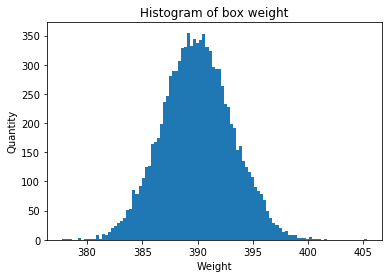

Вероятность того, что масса всей коробки будет меньше 390 граммов: 50.62 %
Вероятность того, что масса всей коробки будет больше 395 граммов: 5.55 %
Вероятность того, что масса всей коробки будет от 380 до 400 граммов: 99.84 %


In [66]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats

# Создаем массив из случайных масс коробок конфет
box_all = []
for i in range(10000):
    candy_weight = np.random.uniform(12, 14, 30)
    box_weight = candy_weight.sum()
    box_all.append(box_weight)
box_all

# Находим математическое ожидание и СКО
mean_box = np.mean(box_all)
std_box = np.std(box_all)

F1 = (390 - mean_box) / std_box
F2 = (395 - mean_box) / std_box
F3 = (380 - mean_box) / std_box
F4 = (400 - mean_box) / std_box


# Строим гистограмму распределения
plt.hist(box_all, 100)
plt.xlabel('Weight')
plt.ylabel('Quantity')
plt.title(r'Histogram of box weight')
plt.show()

# Вычисляем вероятности
P_low390 = scipy.stats.norm.cdf(F1)
print(f'Вероятность того, что масса всей коробки будет меньше 390 граммов:',round(P_low390 * 100, 2),'%')
P_high395 = 1 - scipy.stats.norm.cdf(F2)
print(f'Вероятность того, что масса всей коробки будет больше 395 граммов:',round(P_high395 * 100, 2),'%')
P_380_400 = scipy.stats.norm.cdf(F4) - scipy.stats.norm.cdf(F3)
print(f'Вероятность того, что масса всей коробки будет от 380 до 400 граммов:',round(P_380_400 * 100, 2),'%')